In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [2]:
l1 = [0, 1, 2]
def rename(s):
    l2 = []
    for i in s:
        if i not in l2:
            l2.append(i)
    for i in range(len(s)):
        pos = l2.index(s[i])
        s[i] = l1[pos]
    return s

Text(0.5, 1.0, 'Real')

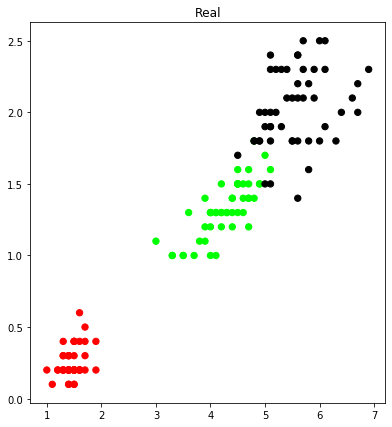

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(x)
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')

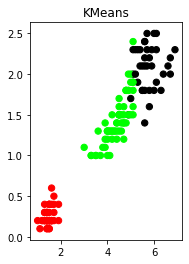

In [4]:
plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('KMeans')
plt.show()

In [5]:
km = rename(model.labels_)
print('Accuracy: ', sm.accuracy_score(y, km))
print('Confusion Matrix\n', sm.confusion_matrix(y, km))

Accuracy:  0.8933333333333333
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns=x.columns)
print(xs.sample(5))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
16      -0.537178     1.939791     -1.397064    -1.052180
139      1.280340     0.098217      0.933271     1.185567
53      -0.416010    -1.743357      0.137547     0.132510
142     -0.052506    -0.822570      0.762758     0.922303
27      -0.779513     1.019004     -1.283389    -1.315444


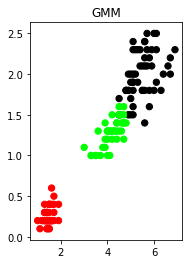

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM')
plt.show()

In [8]:
em = rename(y_cluster_gmm)
print('Accuracy:', sm.accuracy_score(y, em))
print('Confusion Matrix\n', sm.confusion_matrix(y, em))

Accuracy: 0.9666666666666667
Confusion Matrix
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
